# Visualization Using WordCloud

This Code template is to summarize vast pieces of information visually. It is created using WordCloud from wordcloud package.

### Required Packages

In [272]:
pip install wordcloud
pip install nltk

In [12]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re, string
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import SnowballStemmer, WordNetLemmatizer
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

### Initialisation

File path of a text file

In [38]:
#filepath
file_path = "C:/Users/aish2/Documents/BlobCity/Datasets/NLP/Text Summarisation/politics.txt"

### Reading text file

Reading a text file is easy in python compared to other programming languages.We just use open() function in reading or writing mode, loop through readlines() to store in a string variable as we are working on string and not a list.

In [39]:
with open(file_path) as f:
    file_content = ''
    for x in f.readlines():
        file_content += '' +x
file_content[:500]

'Watchdog probes e-mail deletions\n\nThe information commissioner says he is urgently asking for details of Cabinet Office orders telling staff to delete e-mails more than three months old.\n\nRichard Thomas "totally condemned" the deletion of e-mails to prevent their disclosure under freedom of information laws coming into force on 1 January. Government guidance said e-mails should only be deleted if they served "no current purpose", Mr Thomas said. The Tories and the Lib Dems have questioned the ti'


### Data Preprocessing

The text data might contain noise in various forms like emotions, punctuation, text in a different case etc. We apply various text preprocessing methods such as converting text to lowercase, remove text in square brackets, remove links, remove special characters and remove words containing numbers to clean the text data and make it ready to feed data to the model.

We also apply lemmetization technique to the data which groups together the different canonical forms of a word so they can be analysed as a single item which ultimately improves model accuracy.


In [40]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text = text.strip()  
    text = re.compile('<.*?>').sub('', text) 
    text = re.sub(r'[^\w\s]', ' ', str(text))                       
    text = re.sub(r'(?:^| )\w(?:$| )', ' ', text).strip()
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'(?:^| )\w(?:$| )', ' ', text).strip()
    text = ' ' if len(text)==1 else text
    return text

# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

def textfinalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

In [41]:
processed_text = textfinalpreprocess(file_content)
processed_text[:500]

'watchdog probe mail deletion information commissioner say urgently ask detail cabinet office order tell staff delete mail three month old richard thomas totally condemned deletion mail prevent disclosure freedom information law come force january government guidance say mail delete serve current purpose mr thomas say tory lib dems question time new rule tory leader michael howard write tony blair demand explanation new rule mail retention monday lib dem constitutional affair committee chairman a'

### Word Cloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites. These keywords typically are single words that depict the context of the webpage the word cloud is being made from. These words are clustered together to form a Word Cloud.

Each word in this cloud has a variable font size and color tone. Thus, this representation helps to determine words of prominence. A bigger font size of a word portrays its prominence more relative to other words in the cluster. 

Refer [API](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) for parameters

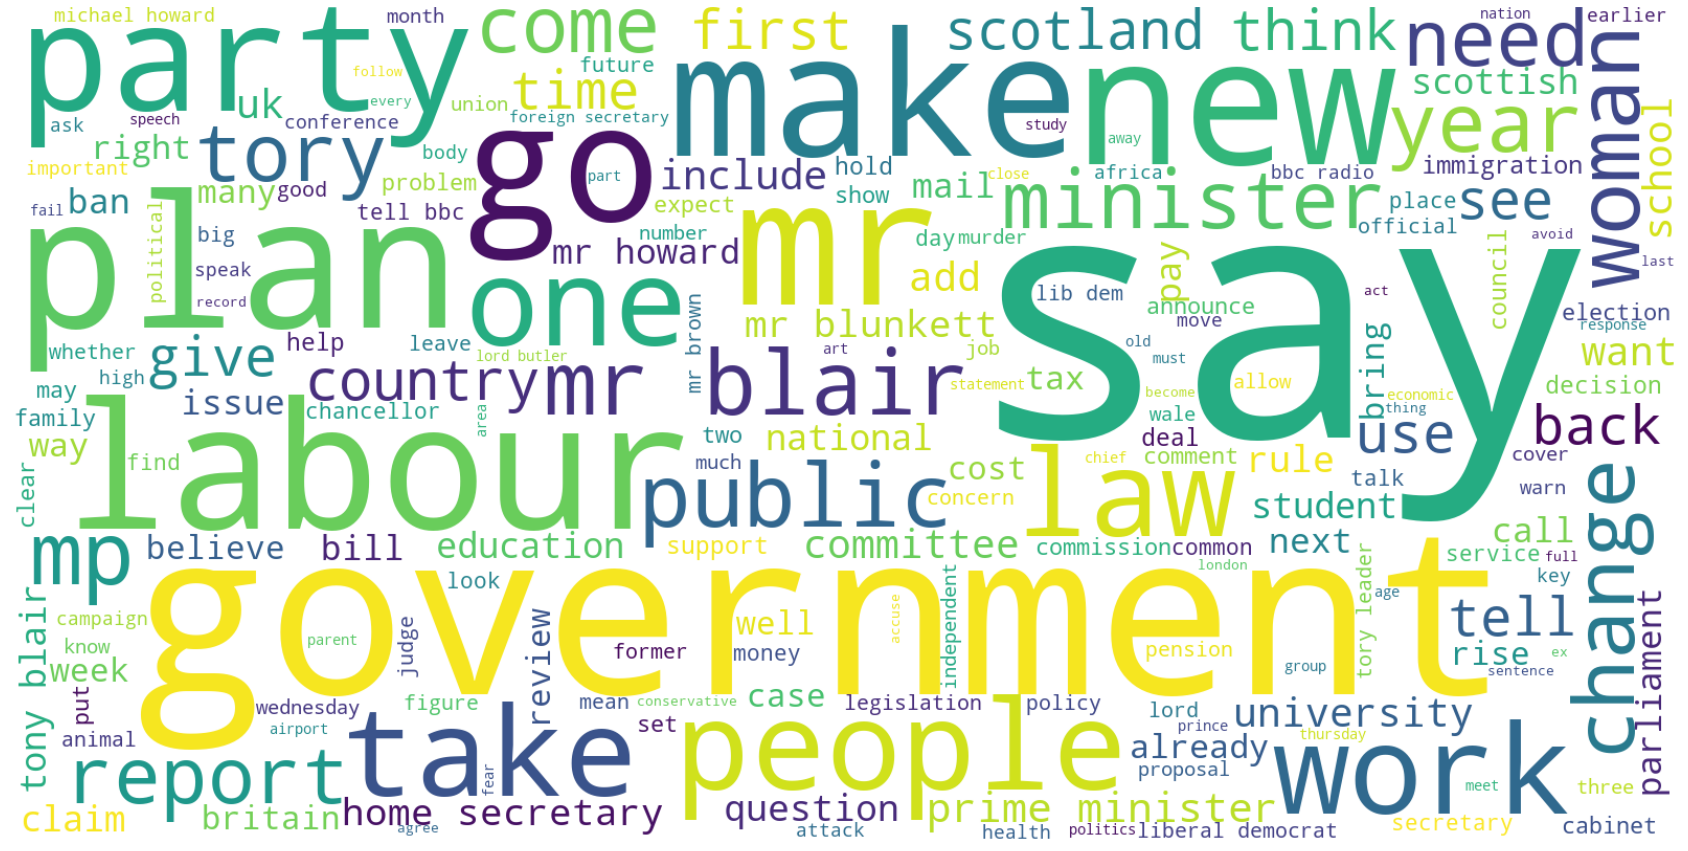

In [42]:
wordcloud = WordCloud(background_color='white',width=1600, height=800).generate(processed_text)
plt.figure( figsize=(30,20))
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
wordcloud.to_file('./wordcloud.png')

#### Creator: Aishwarya Guntoju , Github: [Profile](https://github.com/DSAishwaryaG)